# Significance Test for a Proportion using CitiBike Data

For a categorical variable, the parameter is the population proportion for a category. $\pi$ represents teh population proportion. The test for a porpotion, like the test for a mean, finds a $P$-value for a test statistic measuring the number of standard errors a point estimate falls from a $H_0$ value.

# IDEA: Younger people are more likely to cycle than older people.

# NULL HYPOTHESIS:

The US Census often breaks age groups down into those under 18, those 18 to 44, those 45 to 64, and those 65 and over. This may very well be an arbitrary binning of ages. But for now, I will use this to create different age groups.


$$H_{0}: \pi_{young} = \pi_{old}$$
$$H_{a}: \pi_{young} > \pi_{old}$$


$H_{0}$: The ratio of riders from age 18 to 45 to all riders is the same as the ratio of riders from age 45 upwards to all riders.

$H_{a}$: The ratio of riders from age 18 to 45 to all riders is greater than the ratio of riders from age 45 upwards to all riders.

$$\alpha = 0.05$$

We are aiming for a confidence interval of 95% or a $p$-value less than $\alpha = 0.05$.


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201501'
getCitiBikeCSV(datestring)

WARNING!!! something is wrong: the file is not there!


In [9]:
citibikesData = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
citibikesData['date'] = pd.to_datetime(citibikesData['starttime'])
citibikesData.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [10]:
citibikesData.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype','gender', 'date'], axis=1, inplace=True)
citibikesData.head()

,birth year
0,1960.0
1,1963.0
2,1974.0
3,1969.0
4,1977.0


In [12]:
year = datestring[0:4]
year = int(year)
citibikesData['age'] = year - pd.to_numeric(citibikesData['birth year'])
citibikesData.head()

,birth year,age
0,1960.0,55.0
1,1963.0,52.0
2,1974.0,41.0
3,1969.0,46.0
4,1977.0,38.0


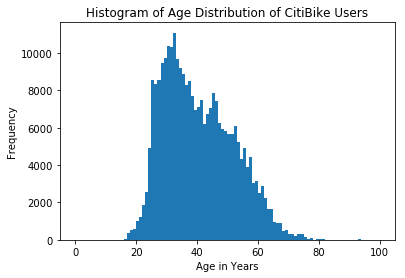

In [44]:
pl.hist(citibikesData.age, 100, (0,100));
title("Histogram of Age Distribution of CitiBike Users");
xlabel("Age in Years");
ylabel("Frequency");

#### Figure 1: A histogram of the age distribution of users suggests that the majority of users is less than 45

In [41]:
total = citibikesData.age.count()
print("Total number of users: " + str(total))

young = citibikesData[citibikesData.age < 45].count()
old = citibikesData[citibikesData.age > 44].count()

print("Number of users younger than 45: " + str(young))
print("Number of users older than 45: " + str(old))

youngRatio = young / total
oldRatio = old / total

print("Percentage who are younger than 45: " + str(youngRatio))
print("Percentage who are older than 45: " + str(oldRatio))

Total number of users: 279924
Number of users younger than 45: birth year    183361
age           183361
dtype: int64
Number of users older than 45: birth year    96563
age           96563
dtype: int64
Percentage who are younger than 45: birth year    0.655039
age           0.655039
dtype: float64
Percentage who are older than 45: birth year    0.344961
age           0.344961
dtype: float64


$$z = \dfrac{\hat{\pi} - \pi_0}{{se}_0}$$

$$se_0 = \sqrt{\frac{\pi_0(1-\pi_0)}{n}}$$

In [1]:
youngRatio = 0.655039
oldRatio = 0.344961
total = 279924

se = sqrt((youngRatio * (1 - youngRatio)) / total)
z = (youngRatio - oldRatio) / se

alpha = 0.05

if z <= 1.96:
    print("Insignificant. Do not reject the null hypothesis.")
else:
    print("Significant. Reject the null hypothesis.")
print("P value = " + str(z))


NameError: name 'sqrt' is not defined